In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

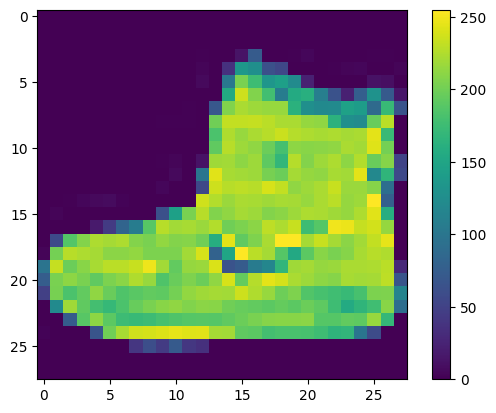

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

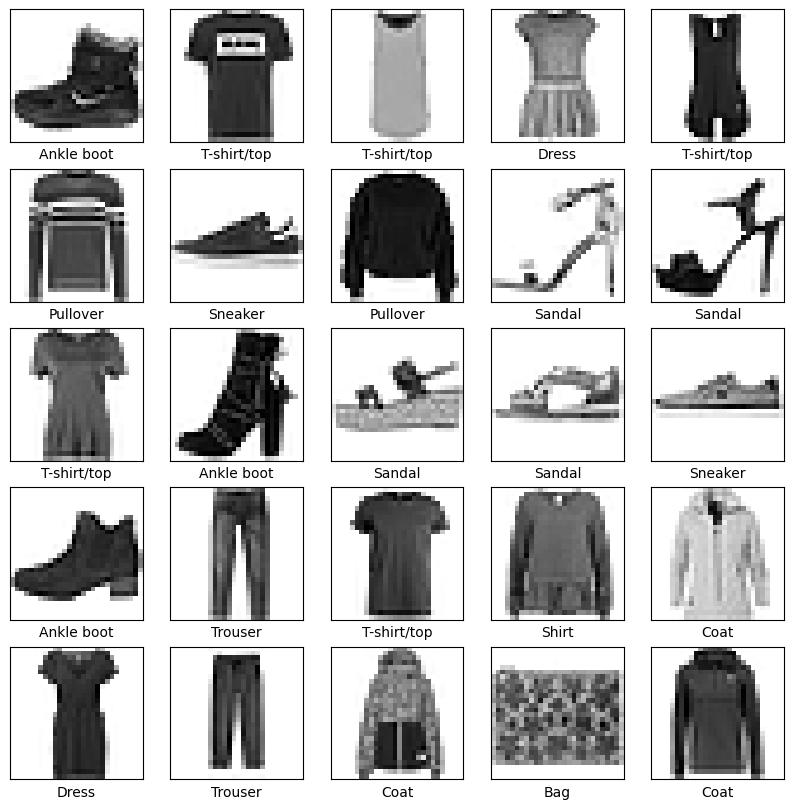

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

ARSITEKTUR MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
#MODEL 2 LAYER LSTM
model2 = tf.keras.Sequential ()
model2.add(tf.keras.layers.LSTM(100, input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(10, activation ='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               51600     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 52610 (205.51 KB)
Trainable params: 52610 (205.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2293 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9173
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2162 - accuracy: 0.9189
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2089 - accuracy: 0.9222
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9229
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1981 - accuracy: 0.9252
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1924 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1862 - accuracy: 0.9298
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1818 - accuracy: 0.9313
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1

In [ ]:
history = model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2401 - accuracy: 0.9101
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2316 - accuracy: 0.9130
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2226 - accuracy: 0.9161
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2170 - accuracy: 0.9182
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2073 - accuracy: 0.9211
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2022 - accuracy: 0.9233
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1951 - accuracy: 0.9260
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1906 - accuracy: 0.9273
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1838 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 37s 20m

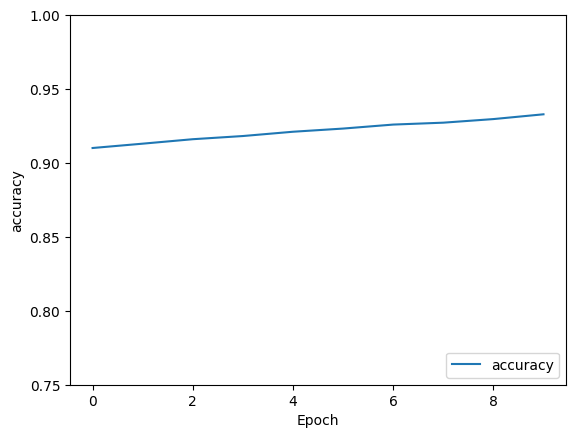

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.75, 1])
plt.legend (loc='lower right')

EVALUASI AKURASI

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.3900 - accuracy: 0.1021 - 820ms/epoch - 3ms/step

Test accuracy: 0.10209999978542328


Membuat Prediksi

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [ ]:
predictions[0]

array([1.6878283e-09, 1.2711748e-10, 2.2411606e-11, 7.9570920e-13,
       1.8433324e-10, 3.7424569e-04, 4.6271884e-09, 2.8684933e-03,
       3.1900589e-09, 9.9675727e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

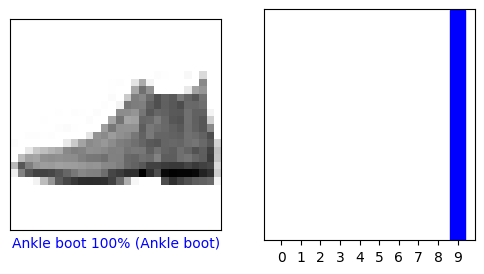

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

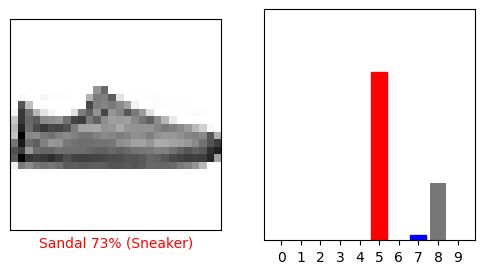

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

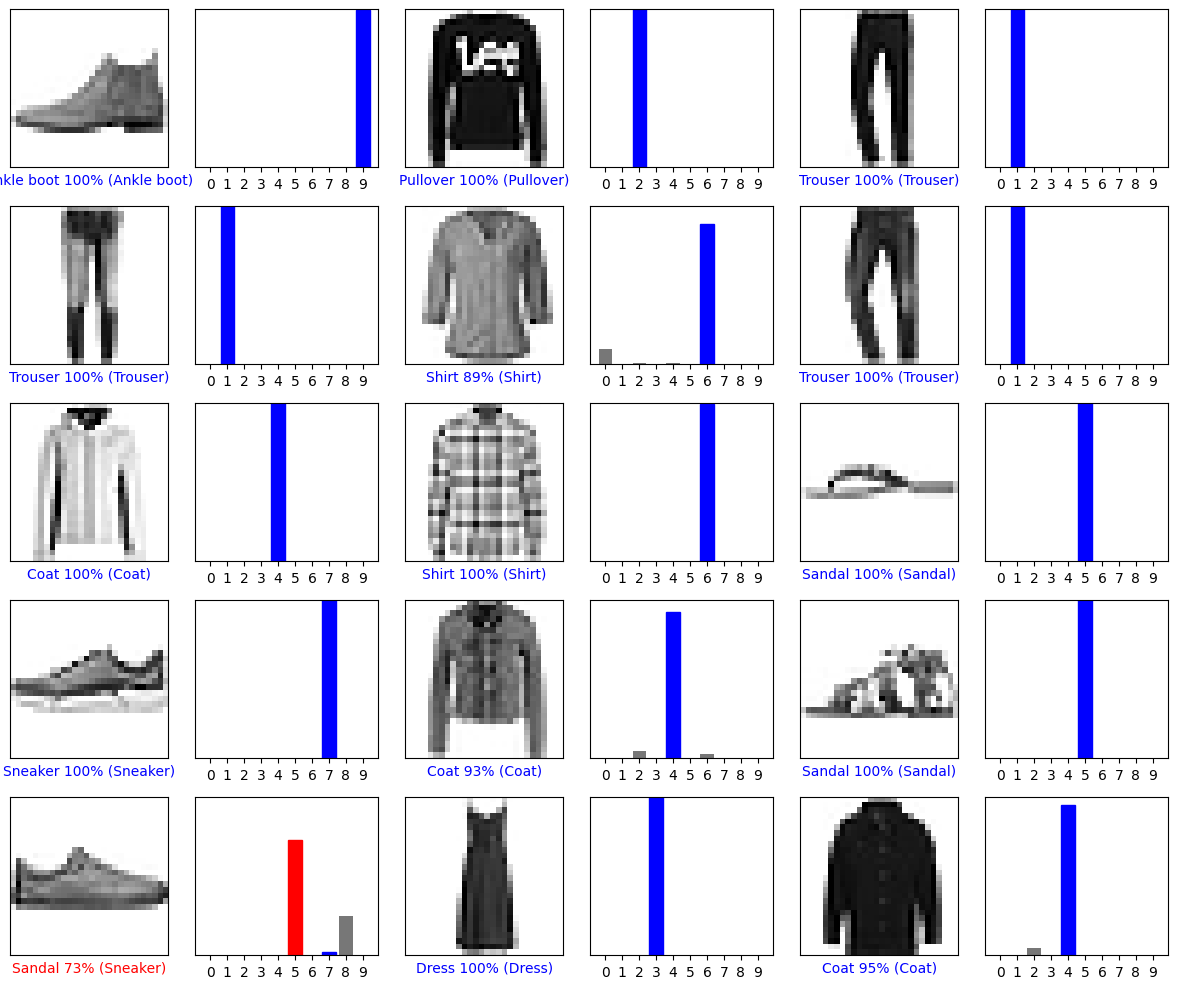

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

pAKE MODEL TERLATIH

In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


prediksi label yg benar buat gambar ini:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[7.2177259e-05 5.2981983e-19 9.9684542e-01 6.0778483e-14 3.0813213e-03
  1.0280484e-13 1.0970758e-06 6.2425621e-20 1.6069825e-12 1.5283454e-15]]


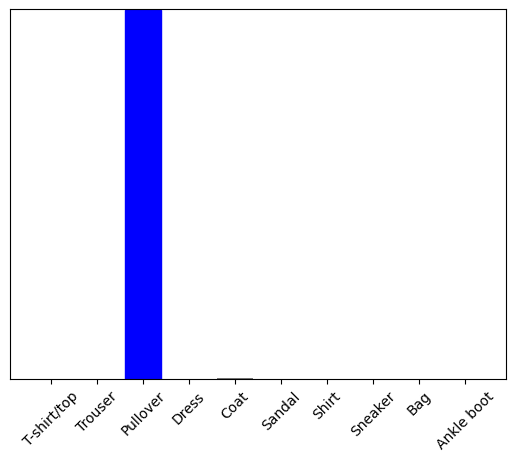

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2